In [25]:
import numpy as np
import pandas as pd
df = pd.read_stata('ccm.dta')
#df.head()  
#pd.set_option('display.max_columns', None)
#print(df.columns)

In [26]:
# Filter Market Caps and companies that dont have gross profit
MiddleMarket_data = df[(df['mkvalt'] >= 0) & (df['mkvalt'] <= 7000)]
# Calculate market capitalization
MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
MiddleMarket_data['Market_Cap'] = MiddleMarket_data['Avg_Price'] * MiddleMarket_data['csho']

/var/folders/64/s_d_67952lx2dcyn1sjsw1tw0000gn/T/ipykernel_44411/1778908525.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
/var/folders/64/s_d_67952lx2dcyn1sjsw1tw0000gn/T/ipykernel_44411/1778908525.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  MiddleMarket_data['Avg_Price'] = (MiddleMarket_data['prch_c'] + MiddleMarket_data['prcl_c']) / 2
/var/folders/64/s_d_67952lx2dcyn1sjsw1tw0000gn/T/ipykernel_44411/17789085

In [27]:
#(MiddleMarket_data['ebitda'] > 1).sum()
#filtered_data = MiddleMarket_data[MiddleMarket_data['ebitda'] > 1]
#filtered_data['ebitda']
filtered_data = MiddleMarket_data.loc[MiddleMarket_data['ebitda'] > 0, ['tic','ebitda','dvc','ob','conm','fdate','lt','fyr','xrd','cogs','oibdp','capx','at','revt', 'xsga','ppent','csho','ppegt', 'che','ceq','lct','prcl_c','prch_c','Avg_Price','Market_Cap','oiadp','invt','sich','emp','txt','xint','act']]
#filtered_data
filtered_data.columns = ['Ticker', 'EBITDA', 'Dividends', 'Operating Income', 'Company Name', 'Fiscal Date', 'Long-Term Debt', 'Fiscal Year', 'Research and Development Expenses', 'Cost of Goods Sold', 'Operating Income Before Depreciation', 'Capital Expenditures', 'Total Assets', 'Revenue', 'Selling, General, and Administrative Expenses', 'Property, Plant, and Equipment Net', 'Common Shares Outstanding', 'Gross Property, Plant, and Equipment', 'Cash and Equivalents', 'Common Equity', 'Current Liabilities', '52-Week Low Price', '52-Week High Price','Avg_Price','Market_Cap','OpInc After Dep','Inventory','SP Index Code','Employees','Taxes','Interest Expense','Current Assets']
filtered_data.reindex()


Ticker   EBITDA  Dividends  Operating Income             Company Name  \
0        AIR  101.800      0.100             750.0                 AAR CORP   
1        AIR  149.300      0.000             850.0                 AAR CORP   
2        AIR  179.300      0.000             740.0                 AAR CORP   
7       CECO   30.514      0.000             183.1  CECO ENVIRONMENTAL CORP   
8       CECO   21.893      0.000             213.9  CECO ENVIRONMENTAL CORP   
...      ...      ...        ...               ...                      ...   
21958   HYFM   36.742      0.000               NaN   HYDROFARM HLDNG GP INC   
21968   KARO   84.155      0.000               NaN             KAROOOOO LTD   
21969   KARO   81.977     15.995               NaN             KAROOOOO LTD   
21976   HSHP   23.744      0.000               NaN    HIMALAYA SHIPPING LTD   
21985   CLCO  277.522     87.511               NaN         COOL COMPANY LTD   

      Fiscal Date  Long-Term Debt  Fiscal Year  \
0      2021-07-22         565.300            5   
1      2022-07-22         539.400            5   
2      2023-07-21         734.000            5   
7      2021-04-01         215.703           12   
8      2022-04-10         210.240           12   
...           ...             ...          ...   
21958  2022-03-31         256.062           12   
21968  2022-06-20          59.330            2   
21969  2023-06-21          57.738            2   
21976  2024-04-12         445.001           12   
21985  2024-03-28        1250.363           12   

       Research and Development Expenses  Cost of Goods Sold  ...  \
0                                    NaN            1364.600  ...   
1                                    NaN            1470.300  ...   
2                                    NaN            1591.300  ...   
7                                    NaN             208.571  ...   
8                                    NaN             220.450  ...   
...                                  ...                 ...  ...   
21958                                NaN             374.733  ...   
21968                              9.673              27.559  ...   
21969                              9.645              37.580  ...   
21976                                NaN               9.146  ...   
21985                                NaN              77.315  ...   

       52-Week High Price  Avg_Price   Market_Cap  OpInc After Dep  Inventory  \
0                   47.99    28.2750  1000.228125           65.500    591.000   
1                   45.49    38.1950  1351.759245          116.200    604.100   
2                   52.83    43.2900  1511.513640          151.400    624.700   
7                    9.00     6.2655   221.591938           20.593     62.841   
8                    9.47     7.6200   266.913360           12.040     68.481   
...                   ...        ...          ...              ...        ...   
21958               95.48    59.9175  2673.399015           21.808    189.134   
21968               40.81    34.9550  1081.892205           51.920      1.644   
21969               39.50    29.7500   920.792250           52.286      4.313   
21976                7.11     5.7050   250.449500           14.626      0.634   
21985               14.50    12.7500   684.713250          200.893      3.659   

       SP Index Code  Employees   Taxes  Interest Expense  Current Assets  
0             5080.0      4.700  18.200             5.000         937.000  
1             5080.0      4.500  26.600             2.400        1007.200  
2             5080.0      5.000  31.400            12.200        1097.900  
7             3564.0      0.730   3.672             3.535         183.485  
8             3564.0      0.730   2.691             2.952         189.011  
...              ...        ...     ...               ...             ...  
21958         3524.0      0.720 -19.137             2.138         269.384  
21968         7370.0      3.508  13.318       

In [28]:
# Reorder the columns
filtered_data = filtered_data[['Ticker', 'Company Name', 'Market_Cap','Fiscal Date', 'Fiscal Year','Employees','SP Index Code', 
                               'EBITDA', 'Operating Income', 'Dividends', 
                               'Long-Term Debt', 'Research and Development Expenses', 
                               'Cost of Goods Sold', 'Operating Income Before Depreciation', 
                               'Capital Expenditures', 'Total Assets', 'Revenue', 
                               'Selling, General, and Administrative Expenses', 
                               'Property, Plant, and Equipment Net', 
                               'Gross Property, Plant, and Equipment', 'Cash and Equivalents', 
                               'Common Equity', 'Current Liabilities', 'Common Shares Outstanding', 
                               '52-Week Low Price', '52-Week High Price', 'Avg_Price', 
                                'Inventory', 'OpInc After Dep','Interest Expense','Taxes', 'Current Assets']]

# Display the reordered DataFrame
filtered_data = filtered_data[(filtered_data['Operating Income'] >= .00)]
filtered_data.replace([np.inf, -np.inf], np.nan, inplace=True)
filtered_data.fillna(0, inplace=True)
filtered_data = filtered_data[(filtered_data['Market_Cap'] >= 100)]
filtered_data.describe()


Market_Cap  Fiscal Year    Employees  SP Index Code       EBITDA  \
count  1663.000000  1663.000000  1663.000000    1663.000000  1663.000000   
mean   1847.761327     9.618160     9.640652    4600.244137   266.369684   
std    1734.708555     3.802315    16.764091    2059.047863   413.525827   
min     101.146145     1.000000     0.000000       0.000000     0.188000   
25%     501.179323     9.000000     1.522000    3516.500000    54.840500   
50%    1195.385555    12.000000     4.100000    3829.000000   153.224000   
75%    2773.881345    12.000000    10.030000    5812.000000   343.620500   
max    9917.757500    12.000000   247.900000    9997.000000  7101.000000   

       Operating Income    Dividends  Long-Term Debt  \
count       1663.000000  1663.000000     1663.000000   
mean        1176.471277    19.453945     1864.667707   
std         3633.537232    44.045634     4003.936418   
min            0.000000    -1.000000        0.000000   
25%            0.000000     0.000000      330.714500   
50%          114.200000     0.000000      849.460000   
75%          799.000000    19.800500     1970.024000   
max        48600.000000   448.253000    71033.000000   

       Research and Development Expenses  Cost of Goods Sold  ...  \
count                        1663.000000         1663.000000  ...   
mean                           21.631925         1861.854750  ...   
std                            59.393221         3658.372116  ...   
min                             0.000000            4.088000  ...   
25%                             0.000000          316.658500  ...   
50%                             0.000000          787.446000  ...   
75%                            14.450000         1906.541500  ...   
max                           750.559000        49842.000000  ...   

       Current Liabilities  Common Shares Outstanding  52-Week Low Price  \
count          1663.000000                1663.000000        1663.000000   
mean            533.028767                  58.867794          28.942968   
std            1131.575785                  63.948130          34.135427   
min               0.000000                   0.585000           0.001100   
25%              92.710500                  22.071000           8.155000   
50%             238.964000                  38.749000          17.815000   
75%             547.441000                  72.955000          36.160000   
max           16954.000000                 809.031000         397.575000   

       52-Week High Price    Avg_Price     Inventory  OpInc After Dep  \
count         1663.000000  1663.000000   1663.000000      1663.000000   
mean            57.045012    42.993990    404.712762       176.174747   
std             58.760140    45.819395    943.691454       278.275295   
min              2.190000     1.405000      0.000000      -664.927000   
25%             20.520000    14.495000     21.328500        23.905500   
50%             39.000000    28.615050    120.952000        93.013000   
75%             73.110000    54.660000    359.538000       226.713500   
max            699.080000   548.327500  11039.349000      3509.000000   

       Interest Expense        Taxes  Current Assets  
count       1663.000000  1663.000000     1663.000000  
mean          54.932618    25.241203      836.101663  
std          162.227375    62.387541     1401.779932  
min          -41.133000  -782.600000        0.000000  
25%            2.685500     1.212000      179.927000  
50%           16.454000    12.164000      448.600000  
75%           49.398000    38.027000      952.166500  
max         3596.000000   468.400000    18340.340000  

[8 rows x 29 columns]

In [29]:
# EV/EBITDA
filtered_data['Enterprise_Value'] = filtered_data['Market_Cap'] + filtered_data['Long-Term Debt'] - filtered_data['Cash and Equivalents']
filtered_data['EV/EBITDA'] = filtered_data['Enterprise_Value'] / filtered_data['EBITDA']
# P/E Ratio
filtered_data['EPS'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Common Shares Outstanding']
filtered_data['P/E'] = filtered_data['Avg_Price'] / filtered_data['EPS']
# Debt-to-Equity Ratio
filtered_data['Debt_to_Equity'] = filtered_data['Long-Term Debt'] / filtered_data['Common Equity']
# Return on Equity (ROE)
filtered_data['ROE'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Common Equity']
# Current Ratio
filtered_data['Current_Ratio'] = filtered_data['Total Assets'] / filtered_data['Current Liabilities']
# Quick Ratio
filtered_data['Quick_Ratio'] = (filtered_data['Total Assets'] - filtered_data['Inventory']) / filtered_data['Current Liabilities']
# Interest Covered Ratio
filtered_data['Interest_Coverage_Ratio'] = filtered_data['EBITDA'] / filtered_data['Interest Expense']
# Gross Margin
filtered_data['Gross_Margin'] = (filtered_data['Revenue'] - filtered_data['Cost of Goods Sold']) / filtered_data['Revenue']
# Operating Margin
filtered_data['Operating_Margin'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Revenue']
# Calculate Gross Profit
filtered_data['Gross Profit'] = filtered_data['Revenue'] - filtered_data['Cost of Goods Sold']
# Calculate Gross Profit Margin
filtered_data['Gross Profit Margin'] = (filtered_data['Gross Profit'] / filtered_data['Revenue']) 
#EV/GP 
filtered_data['EV/GP'] = filtered_data['Enterprise_Value'] / filtered_data['Gross Profit']
# Calculate EBITDA - Capex
filtered_data['EBITDA - Capex'] = filtered_data['EBITDA'] - filtered_data['Capital Expenditures']
# Calculate EBITDA - Capex margin
filtered_data['EBITDA - Capex Margin'] = (filtered_data['EBITDA - Capex'] / filtered_data['EBITDA']) 
filtered_data['EV/EBITDA-Capex'] = filtered_data['Enterprise_Value'] / filtered_data['EBITDA - Capex']
filtered_data['Free Cash Flow'] = (filtered_data['EBITDA']
                                   - filtered_data['Taxes']
                                   - filtered_data['Interest Expense']
                                   + (filtered_data['Current Assets'] - filtered_data['Current Liabilities'])
                                   - filtered_data['Capital Expenditures'])
filtered_data['FCF_Positive'] = (filtered_data['Free Cash Flow'] > 0).astype(int)
filtered_data['FCF Yield'] = filtered_data['Free Cash Flow'] / filtered_data['Market_Cap']
filtered_data['Invested_Capital'] = filtered_data['Long-Term Debt'] + filtered_data['Common Equity']
filtered_data['EBIT'] = filtered_data['Operating Income'] + filtered_data['Interest Expense'] + filtered_data['Taxes']
filtered_data['EV_EBIT'] = filtered_data['Enterprise_Value'] / filtered_data['EBIT']
filtered_data['ROIC'] = filtered_data['EBIT'] / filtered_data['Invested_Capital']
filtered_data['EBIT Margin (%)'] = (filtered_data['EBIT'] / filtered_data['Revenue']) 
filtered_data['EBIT_Positive'] = (filtered_data['EBIT'] > 0).astype(int)
filtered_data

filtered_data['Revenue per Employee'] = filtered_data['Revenue'] / filtered_data['Employees']

filtered_data['Total Debt Service'] = filtered_data['Long-Term Debt'] + filtered_data['Interest Expense']
filtered_data['Debt_Coverage_Ratio'] = filtered_data['Operating Income Before Depreciation'] / filtered_data['Total Debt Service']

filtered_data['Dividend (y/n)'] = (filtered_data['Dividends'] > 0).astype(int)

filtered_data['Price_Range_Ratio'] = (filtered_data['52-Week High Price'] - filtered_data['52-Week Low Price']) / filtered_data['52-Week Low Price']

filtered_data.describe()

Market_Cap  Fiscal Year    Employees  SP Index Code       EBITDA  \
count  1663.000000  1663.000000  1663.000000    1663.000000  1663.000000   
mean   1847.761327     9.618160     9.640652    4600.244137   266.369684   
std    1734.708555     3.802315    16.764091    2059.047863   413.525827   
min     101.146145     1.000000     0.000000       0.000000     0.188000   
25%     501.179323     9.000000     1.522000    3516.500000    54.840500   
50%    1195.385555    12.000000     4.100000    3829.000000   153.224000   
75%    2773.881345    12.000000    10.030000    5812.000000   343.620500   
max    9917.757500    12.000000   247.900000    9997.000000  7101.000000   

       Operating Income    Dividends  Long-Term Debt  \
count       1663.000000  1663.000000     1663.000000   
mean        1176.471277    19.453945     1864.667707   
std         3633.537232    44.045634     4003.936418   
min            0.000000    -1.000000        0.000000   
25%            0.000000     0.000000      330.714500   
50%          114.200000     0.000000      849.460000   
75%          799.000000    19.800500     1970.024000   
max        48600.000000   448.253000    71033.000000   

       Research and Development Expenses  Cost of Goods Sold  ...  \
count                        1663.000000         1663.000000  ...   
mean                           21.631925         1861.854750  ...   
std                            59.393221         3658.372116  ...   
min                             0.000000            4.088000  ...   
25%                             0.000000          316.658500  ...   
50%                             0.000000          787.446000  ...   
75%                            14.450000         1906.541500  ...   
max                           750.559000        49842.000000  ...   

               EBIT      EV_EBIT         ROIC  EBIT Margin (%)  EBIT_Positive  \
count   1663.000000  1663.000000  1663.000000      1663.000000    1663.000000   
mean    1256.645097    26.247835     0.479400         0.584754       0.968731   
std     3679.798120   334.711981     0.876728         1.192598       0.174096   
min     -170.600000 -6509.207271    -0.273923        -0.209345       0.000000   
25%       44.579000     2.041496     0.033385         0.032344       1.000000   
50%      209.000000     6.782164     0.186570         0.245384       1.000000   
75%      876.000000    36.460802     0.546003         0.691498       1.000000   
max    48929.100000  6556.449349    10.767444        21.560327       1.000000   

       Revenue per Employee  Total Debt Service  Debt_Coverage_Ratio  \
count           1663.000000         1663.000000          1663.000000   
mean                    inf         1919.600325                  inf   
std                     NaN         4153.623848                  NaN   
min               21.764279            0.000000             0.000719   
25%              190.629552          333.716000             0.103155   
50%              297.017012          864.246000             0.165980   
75%              463.349462         2024.161500             0.266358   
max                     inf        73571.000000                  inf   

       Dividend (y/n)  Price_Range_Ratio  
count     1663.000000        1663.000000  
mean         0.448587          19.084868  
std          0.497499         654.463116  
min          0.000000           0.162122  
25%          0.000000           0.637362  
50%          0.000000           1.004762  
75%          1.000000           1.741008  
max          1.000000       26653.545455  

[8 rows x 60 columns]

In [30]:
# Group the data by "Ticker" and sort by "Fiscal Year"
grouped_data = filtered_data.sort_values(by=['Ticker', 'Fiscal Year']).groupby('Ticker')

# Calculate year-over-year changes in margins
filtered_data['YOY_Gross_Margin_Change'] = grouped_data['Gross_Margin'].pct_change()
filtered_data['YOY_EBIT_Margin_Change'] = grouped_data['EBIT Margin (%)'].pct_change()
filtered_data['YOY_Operating_Margin_Change'] = grouped_data['Operating_Margin'].pct_change()
filtered_data['YOY_Gross_Profit_Change'] = grouped_data['Gross Profit'].pct_change()
filtered_data['YOY_Revenue_Change'] = grouped_data['Revenue'].pct_change()
filtered_data['YOY_EBIT_Change'] = grouped_data['EBIT'].pct_change()
filtered_data

Ticker             Company Name   Market_Cap          Fiscal Date  \
0        AIR                 AAR CORP  1000.228125  2021-07-22 00:00:00   
1        AIR                 AAR CORP  1351.759245  2022-07-22 00:00:00   
2        AIR                 AAR CORP  1511.513640  2023-07-21 00:00:00   
7       CECO  CECO ENVIRONMENTAL CORP   221.591938  2021-04-01 00:00:00   
8       CECO  CECO ENVIRONMENTAL CORP   266.913360  2022-04-10 00:00:00   
...      ...                      ...          ...                  ...   
21897    NVT       NVENT ELECTRIC PLC  5763.204540  2023-03-14 00:00:00   
21909    ACA               ARCOSA INC  2058.140000  2021-03-06 00:00:00   
21910    ACA               ARCOSA INC  2804.056500  2022-03-11 00:00:00   
21911    ACA               ARCOSA INC  2643.124000  2023-03-06 00:00:00   
21912    ACA               ARCOSA INC  3310.875000  2024-03-01 00:00:00   

       Fiscal Year  Employees  SP Index Code   EBITDA  Operating Income  \
0                5      4.700         5080.0  101.800             750.0   
1                5      4.500         5080.0  149.300             850.0   
2                5      5.000         5080.0  179.300             740.0   
7               12      0.730         3564.0   30.514             183.1   
8               12      0.730         3564.0   21.893             213.9   
...            ...        ...            ...      ...               ...   
21897           12     10.400         3440.0  561.800             607.3   
21909           12      6.410         3440.0  283.700             525.1   
21910           12      6.170         3440.0  267.000             552.2   
21911           12      5.230         3440.0  324.500             896.4   
21912           12      6.075         3440.0  339.400            1621.2   

       Dividends  ...  Total Debt Service  Debt_Coverage_Ratio  \
0            0.1  ...             570.300             0.178503   
1            0.0  ...             541.800             0.275563   
2            0.0  ...             746.200             0.240284   
7            0.0  ...             219.238             0.139182   
8            0.0  ...             213.192             0.102691   
...          ...  ...                 ...                  ...   
21897      117.0  ...            2201.700             0.255166   
21909        9.8  ...             765.100             0.370801   
21910        9.8  ...            1258.200             0.212208   
21911        9.8  ...            1187.200             0.273332   
21912        9.8  ...            1274.000             0.266405   

       Dividend (y/n)  Price_Range_Ratio  YOY_Gross_Margin_Change  \
0                   1           4.606308                      NaN   
1                   0           0.472168                 0.098939   
2                   0           0.565333                 0.051030   
7                   0           1.548853                      NaN   
8                   0           0.641248                -0.059107   
...               ...                ...                      ...   
21897               1           0.388147                -0.024248   
21909               1           1.034826                      NaN   
21910               1           0.436726                -0.053422   
21911               1           0.515431                 0.037845   
21912               1           0.618178                 0.007841   

       YOY_EBIT_Margin_Change  YOY_Operating_Margin_Change  \
0                         NaN                          NaN   
1                    0.033167                     0.332863   
2                   -0.186232                     0.096264   
7                         NaN                          NaN   
8                    0.124694                    -0.300519   
...                       ...                          ...   
21897               -0.057311                     0.006080   
21909                     NaN                          NaN   
21910               -0.0

In [31]:
# Define a function to map SP Index Codes to divisions
def map_sp_index_to_division(sp_index_code):
    if sp_index_code >= 100 and sp_index_code <= 999:
        return 'Agriculture, Forestry and Fishing'
    elif sp_index_code >= 1000 and sp_index_code <= 1499:
        return 'Mining'
    elif sp_index_code >= 1500 and sp_index_code <= 1799:
        return 'Construction'
    elif sp_index_code >= 2000 and sp_index_code <= 3999:
        return 'Manufacturing'
    elif sp_index_code >= 4000 and sp_index_code <= 4999:
        return 'Transportation, Communications, Electric, Gas and Sanitary service'
    elif sp_index_code >= 5000 and sp_index_code <= 5199:
        return 'Wholesale Trade'
    elif sp_index_code >= 5200 and sp_index_code <= 5999:
        return 'Retail Trade'
    elif sp_index_code >= 6000 and sp_index_code <= 6799:
        return 'Finance, Insurance and Real Estate'
    elif sp_index_code >= 7000 and sp_index_code <= 8999:
        return 'Services'
    elif sp_index_code >= 9100 and sp_index_code <= 9729:
        return 'Public Administration'
    elif sp_index_code >= 9900 and sp_index_code <= 9999:
        return 'Nonclassifiable'
    else:
        return 'Unknown'

# Add a new column 'Division' based on 'SP Index Code'
filtered_data['Division'] = filtered_data['SP Index Code'].apply(map_sp_index_to_division)


In [32]:
# Select columns of interest
selected_columns = ['Ticker', 'EV/EBITDA', 'P/E', 'EV_EBIT','Debt_to_Equity', 'ROE','FCF_Positive', 'FCF Yield', 'ROIC','Debt_Coverage_Ratio','Division',
                    'Current_Ratio', 'Quick_Ratio', 'Interest_Coverage_Ratio', 'Gross_Margin', 'Dividend (y/n)','Revenue per Employee',
                    'Operating_Margin', 'EV/GP' , 'EBIT Margin (%)', 'EV/EBITDA-Capex','YOY_Gross_Margin_Change', 'YOY_EBIT_Margin_Change','Price_Range_Ratio',
                    'YOY_Operating_Margin_Change', 'YOY_Gross_Profit_Change', 'YOY_Revenue_Change','YOY_EBIT_Change']

# Create a new DataFrame with selected columns
selected_df = filtered_data[selected_columns]
selected_df

Ticker  EV/EBITDA        P/E    EV_EBIT  Debt_to_Equity       ROE  \
0        AIR  14.787113   9.825424   1.946881        0.580152  0.104475   
1        AIR  12.272333   9.053980   2.084482        0.521411  0.144321   
2        AIR  12.067561   8.430082   2.761248        0.667819  0.163133   
7       CECO  13.091825   7.261976   2.099155        1.064370  0.150569   
8       CECO  20.333365  12.191722   2.027659        1.027797  0.107028   
...      ...        ...        ...        ...             ...       ...   
21897    NVT  13.592390  10.258463  10.735561        0.794560  0.205659   
21909    ACA   9.576454   7.254635   4.789071        0.398742  0.149931   
21910    ACA  14.853770  10.502084   6.726521        0.632161  0.136692   
21911    ACA  11.213941   8.145220   3.646947        0.529299  0.148553   
21912    ACA  13.117192   9.755082   2.640555        0.534262  0.145540   

       FCF_Positive  FCF Yield      ROIC  Debt_Coverage_Ratio  ...     EV/GP  \
0                 1   0.667348  0.502176             0.178503  ...  5.248703   
1                 1   0.563710  0.558485             0.275563  ...  5.283331   
2                 1   0.564070  0.427473             0.240284  ...  5.418767   
7                 1   0.421906  0.454887             0.139182  ...  3.718205   
8                 1   0.322052  0.529282             0.102691  ...  4.293166   
...             ...        ...       ...                  ...  ...       ...   
21897             1   0.172057  0.145098             0.255166  ...  6.306222   
21909             1   0.249740  0.214342             0.370801  ...  5.360773   
21910             1   0.195574  0.184938             0.212208  ...  7.887742   
21911             1   0.217243  0.298689             0.273332  ...  6.307721   
21912             1   0.166693  0.471226             0.266405  ...  7.441041   

       EBIT Margin (%)  EV/EBITDA-Capex  YOY_Gross_Margin_Change  \
0             0.468209        16.633460                      NaN   
1             0.483738        13.880752                 0.098939   
2             0.393650        14.444016                 0.051030   
7             0.602216        15.035716                      NaN   
8             0.677309        23.092720                -0.059107   
...                ...              ...                      ...   
21897         0.244517        14.801715                -0.024248   
21909         0.293087        13.476389                      NaN   
21910         0.290629        21.802949                -0.053422   
21911         0.444890        19.511657                 0.037845   
21912         0.730534        32.759198                 0.007841   

       YOY_EBIT_Margin_Change  Price_Range_Ratio  YOY_Operating_Margin_Change  \
0                         NaN           4.606308                          NaN   
1                    0.033167           0.472168                     0.332863   
2                   -0.186232           0.565333                     0.096264   
7                         NaN           1.548853                          NaN   
8                    0.124694           0.641248                    -0.300519   
...                       ...                ...                          ...   
21897               -0.057311           0.388147                     0.006080   
21909                     NaN           1.034826                          NaN   
21910               -0.008386           0.436726                    -0.102055   
21911                0.530782           0.515431                     0.099337   
21912                0.642055           0.618178                     0.016414   

       YOY_Gross_Profit_Change  YOY_Revenue_Change  YOY_EBIT_Change  
0                          NaN                 NaN              NaN  
1                     0.209205            0.100339         0.136834  
2                     0.151384            0.095482        -0.108532  
7                          NaN                 NaN              NaN  
8   

In [33]:
selected_df = selected_df[(selected_df['Operating_Margin'] <= 2)& (selected_df['Operating_Margin'] >= 0.0)]
selected_df = selected_df[(selected_df['EV/EBITDA'] <= 30)& (selected_df['EV/EBITDA'] >= 1)]
selected_df = selected_df[(selected_df['EV_EBIT'] <= 30)& (selected_df['EV_EBIT'] >= 0)]
selected_df = selected_df[(selected_df['EBIT Margin (%)'] <= 1) & (selected_df['EBIT Margin (%)'] >= 0)]
selected_df = selected_df[(selected_df['Debt_to_Equity'] >= 0)]
selected_df = selected_df[(selected_df['YOY_Operating_Margin_Change'] >= -.75) & (selected_df['YOY_Operating_Margin_Change'] <= 5)]
selected_df = selected_df[(selected_df['Revenue per Employee'] <= 1200)]
selected_df = selected_df[(selected_df['ROE'] <= 1.3)]
# Display the reordered DataFrame
selected_df.replace([np.inf, -np.inf], np.nan, inplace=True)
selected_df.fillna(0, inplace=True)
selected_df= selected_df[(filtered_data['Market_Cap'] >= 100)]
selected_df.describe()

/var/folders/64/s_d_67952lx2dcyn1sjsw1tw0000gn/T/ipykernel_44411/2027635365.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  selected_df= selected_df[(filtered_data['Market_Cap'] >= 100)]


EV/EBITDA         P/E     EV_EBIT  Debt_to_Equity         ROE  \
count  409.000000  409.000000  409.000000      409.000000  409.000000   
mean    13.015425    9.288276    7.881058        1.528851    0.312727   
std      5.607168    5.743280    7.477474        1.703812    0.202196   
min      4.151040    0.985545    0.720141        0.072766    0.022667   
25%      8.779656    5.183379    2.763229        0.640377    0.183625   
50%     12.119965    8.238504    4.924444        1.065498    0.261933   
75%     16.122366   12.123796   10.117976        1.666183    0.381787   
max     29.365962   51.391907   29.598541       12.803426    1.247368   

       FCF_Positive   FCF Yield        ROIC  Debt_Coverage_Ratio  \
count    409.000000  409.000000  409.000000           409.000000   
mean       0.958435    0.347142    0.399197             0.316474   
std        0.199837    0.279538    0.347160             0.308823   
min        0.000000   -1.131943    0.020659             0.035747   
25%        1.000000    0.193462    0.152867             0.159911   
50%        1.000000    0.295521    0.302633             0.223614   
75%        1.000000    0.465496    0.529282             0.361519   
max        1.000000    1.354691    2.185246             2.931487   

       Current_Ratio  ...       EV/GP  EBIT Margin (%)  EV/EBITDA-Capex  \
count     409.000000  ...  409.000000       409.000000       409.000000   
mean        5.750515  ...    5.260136         0.411927        25.369423   
std         3.109089  ...    2.653500         0.263294       180.606674   
min         0.000000  ...    0.971546         0.012567      -989.167637   
25%         3.853622  ...    3.389714         0.176379        10.702243   
50%         5.148508  ...    4.975646         0.388292        14.801715   
75%         6.912787  ...    6.590500         0.620948        21.524935   
max        25.570089  ...   22.795606         0.999616      3349.034597   

       YOY_Gross_Margin_Change  YOY_EBIT_Margin_Change  Price_Range_Ratio  \
count               409.000000              409.000000         409.000000   
mean                  0.015600                0.107953          66.053008   
std                   0.118428                1.001708        1317.889310   
min                  -0.475901              -12.860344           0.162122   
25%                  -0.040231               -0.157913           0.515431   
50%                   0.003476                0.015525           0.709036   
75%                   0.058209                0.263993           1.026352   
max                   0.528950                9.768831       26653.545455   

       YOY_Operating_Margin_Change  YOY_Gross_Profit_Change  \
count                   409.000000               409.000000   
mean                      0.166989                 0.188951   
std                       0.560663                 0.370973   
min                      -0.723035                -0.501223   
25%                      -0.075253                 0.015779   
50%                       0.048498                 0.120676   
75%                       0.241029                 0.278495   
max                       3.799963                 3.867354   

       YOY_Revenue_Change  YOY_EBIT_Change  
count          409.000000       409.000000  
mean             0.178203         0.289994  
std              0.485092         1.390917  
min             -0.506198       -18.315068  
25%              0.031414        -0.104385  
50%              0.114705         0.136354  
75%              0.237312         0.499865  
max              7.515919        13.599818  

[8 rows x 26 columns]

In [34]:
# Define the multiples and metrics
multiples = ['EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Group data by sector
grouped_data = selected_df.groupby('Division')

# Calculate correlation between multiples and metrics for each sector
correlation_results = {}
for sector, group in grouped_data:
    correlation_results[sector] = {}
    for multiple in multiples:
        for metric in metrics:
            correlation = group[multiple].corr(group[metric])
            correlation_results[sector][(multiple, metric)] = correlation

# Display correlation results
for sector, result in correlation_results.items():
    print(f"--- {sector} ---")
    for (multiple, metric), correlation in result.items():
        print(f"{multiple} vs {metric}: {correlation}")


--- Construction ---
EV/EBITDA vs Debt_Coverage_Ratio: -0.7278106446505381
EV/EBITDA vs ROE: -0.5468267258254026
EV/EBITDA vs EBIT Margin (%): -0.024827842744818796
EV/EBITDA vs YOY_Gross_Profit_Change: -0.34421457209000395
EV/EBITDA vs ROIC: 0.19304061401961478
EV/EBITDA vs FCF_Positive: nan
EV/EBITDA vs Gross_Margin: -0.37093618481876284
EV/EBITDA vs Quick_Ratio: -0.4386339776020816
EV/EBITDA vs Current_Ratio: -0.41862180779644453
EV/EBITDA vs Debt_to_Equity: -0.08253993648390796
EV/EBITDA vs Revenue per Employee: -0.43376131542322516
EV/EBITDA vs YOY_Revenue_Change: 0.41535539527917886
EV/EBITDA vs YOY_EBIT_Change: 0.12092851745778024
P/E vs Debt_Coverage_Ratio: -0.11547145929596164
P/E vs ROE: -0.0930913454960337
P/E vs EBIT Margin (%): -0.2534045638216826
P/E vs YOY_Gross_Profit_Change: -0.23651985056922428
P/E vs ROIC: -0.003987008042616214
P/E vs FCF_Positive: nan
P/E vs Gross_Margin: 0.11441299563727578
P/E vs Quick_Ratio: -0.1681978131615252
P/E vs Current_Ratio: -0.1145931944

--- Construction ---


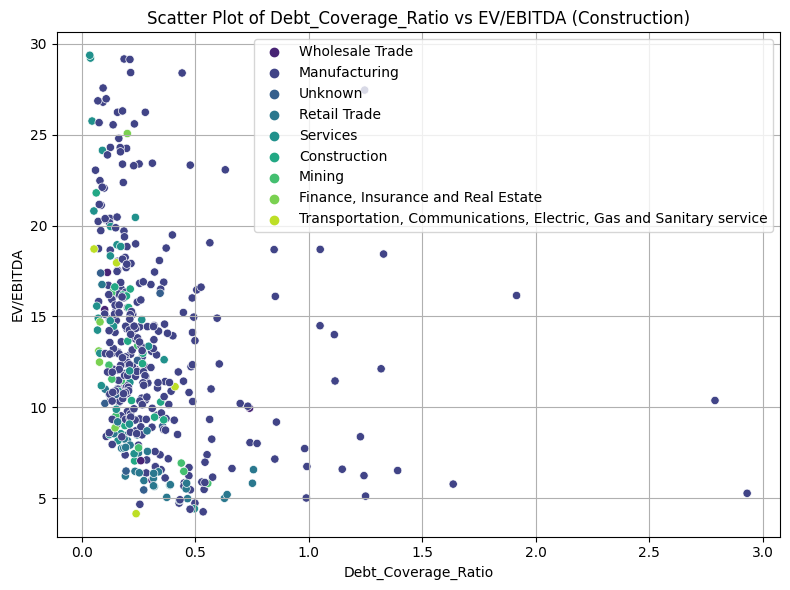

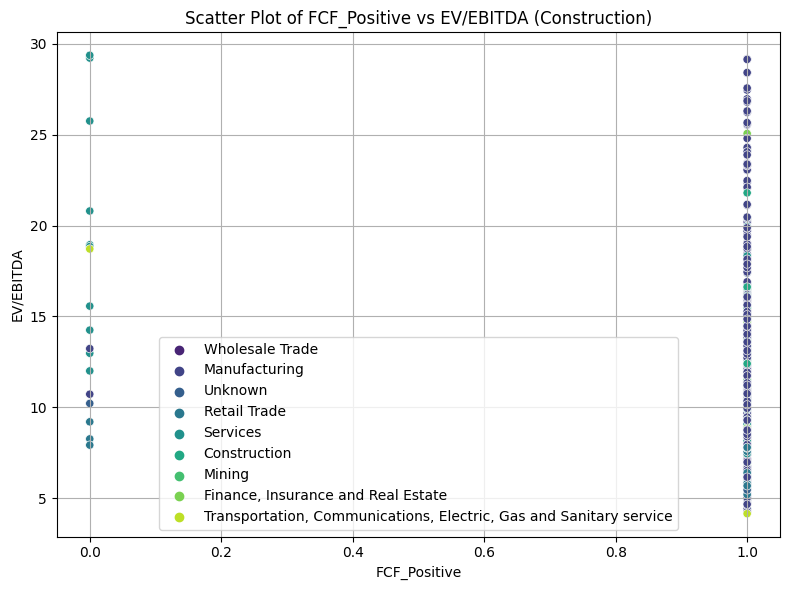

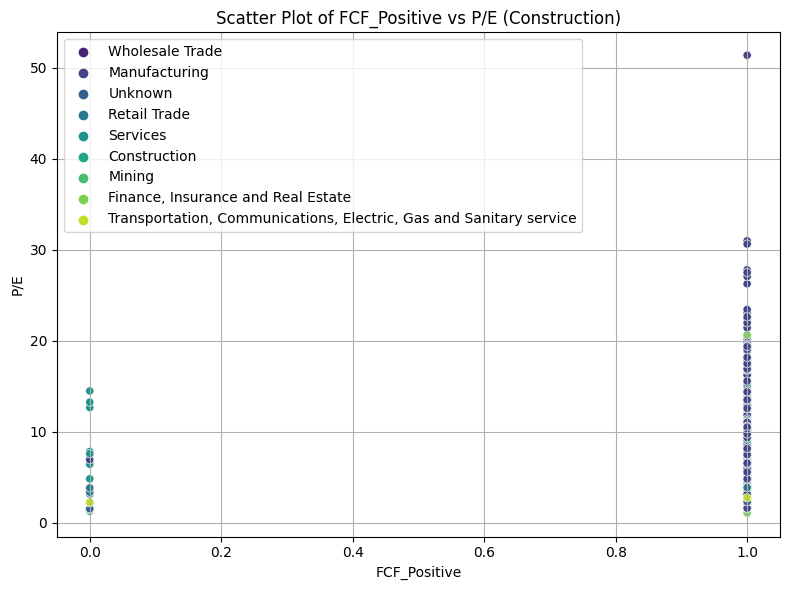

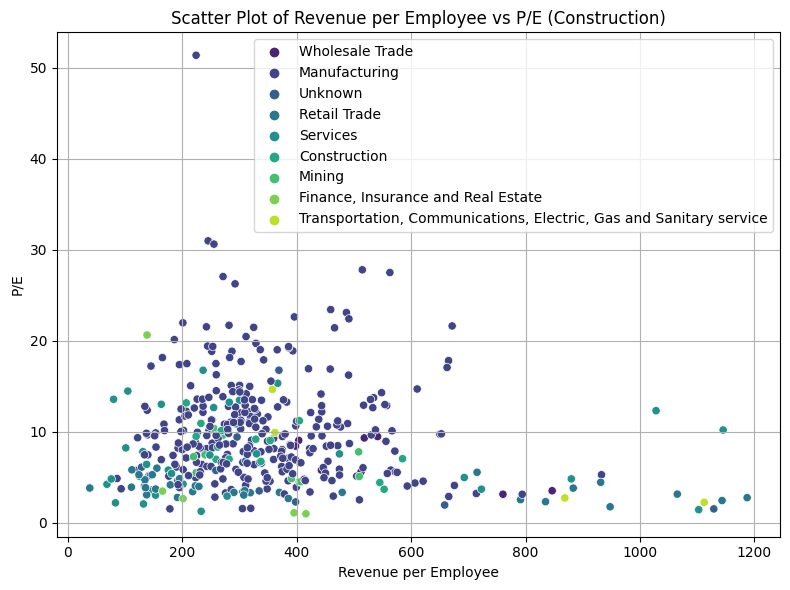

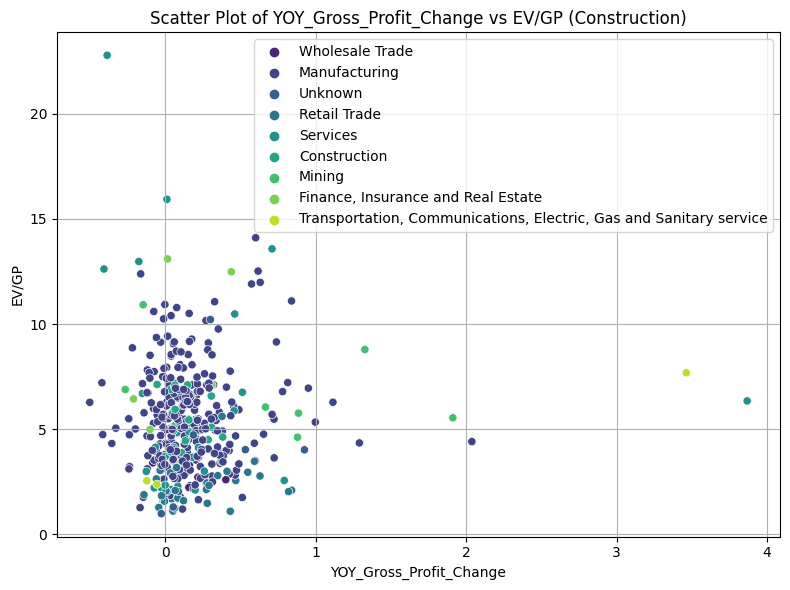

--- Finance, Insurance and Real Estate ---


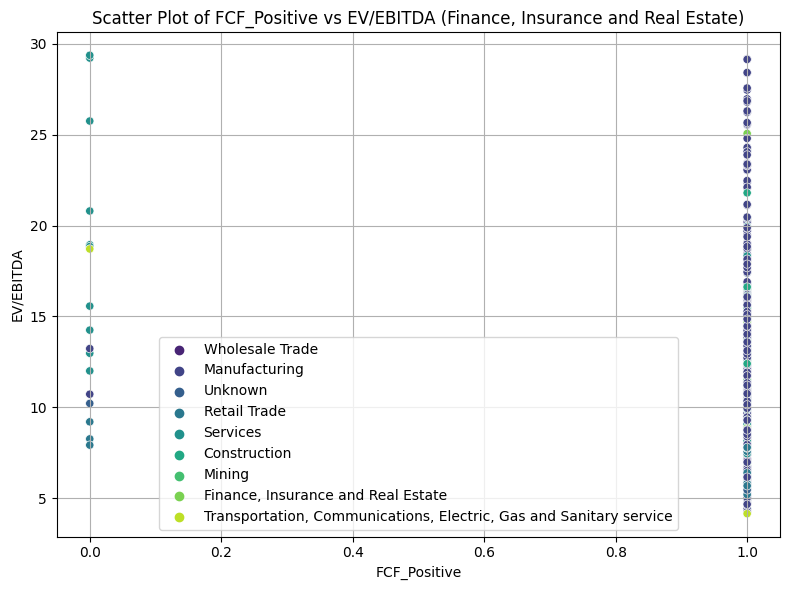

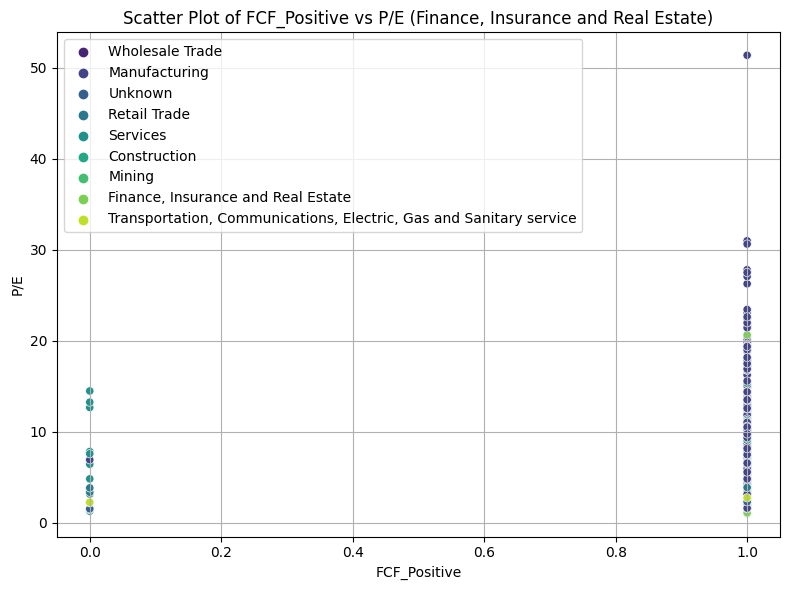

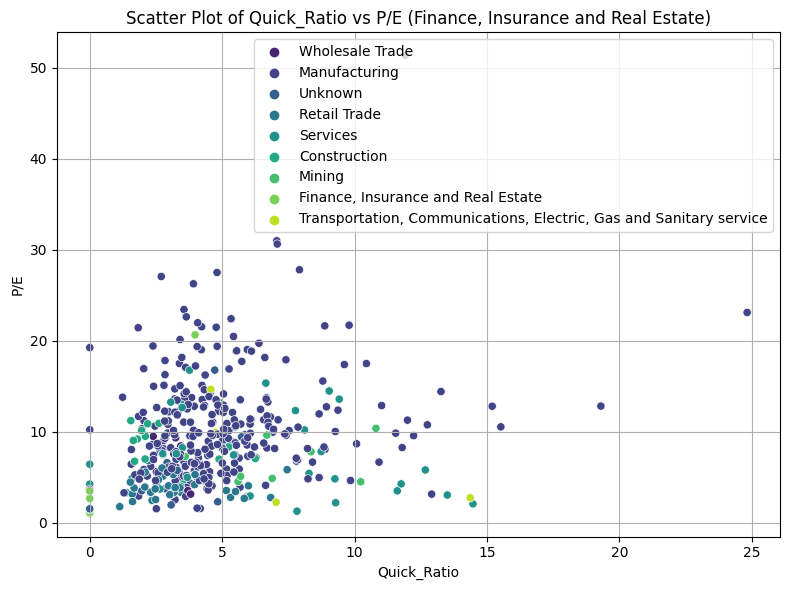

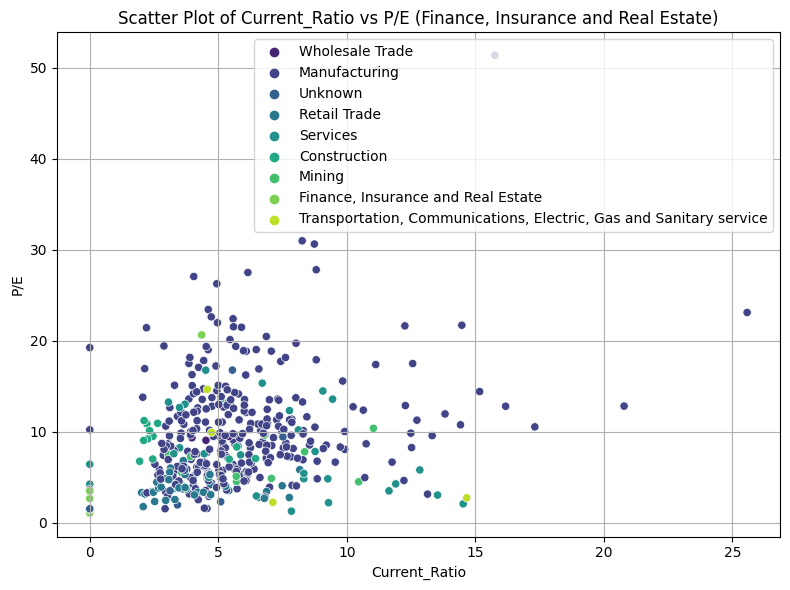

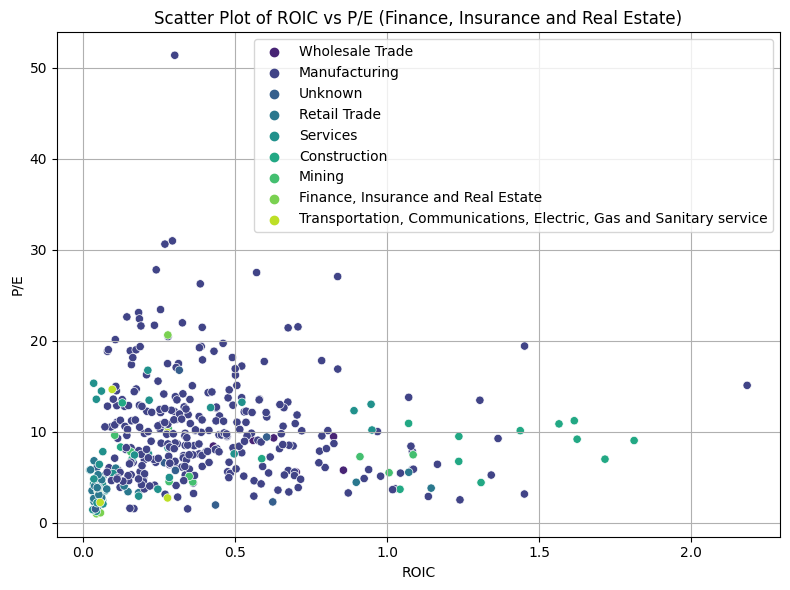

--- Manufacturing ---


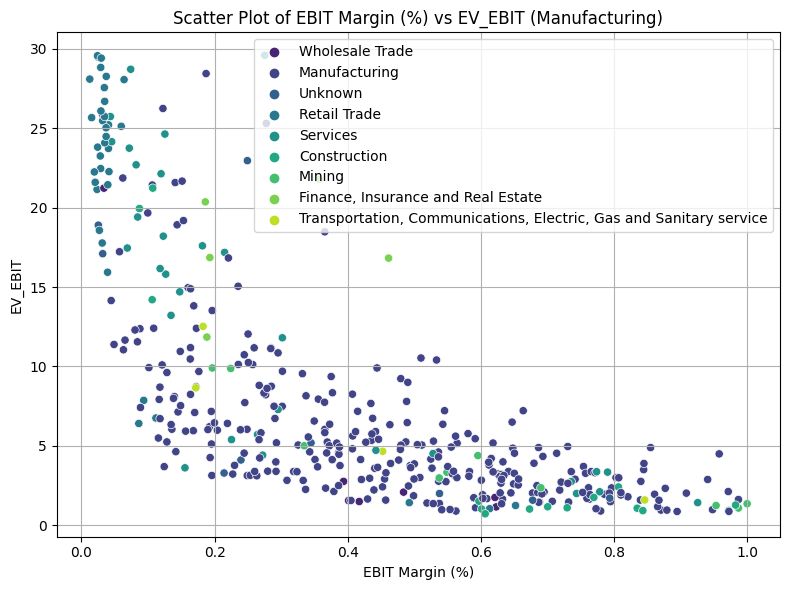

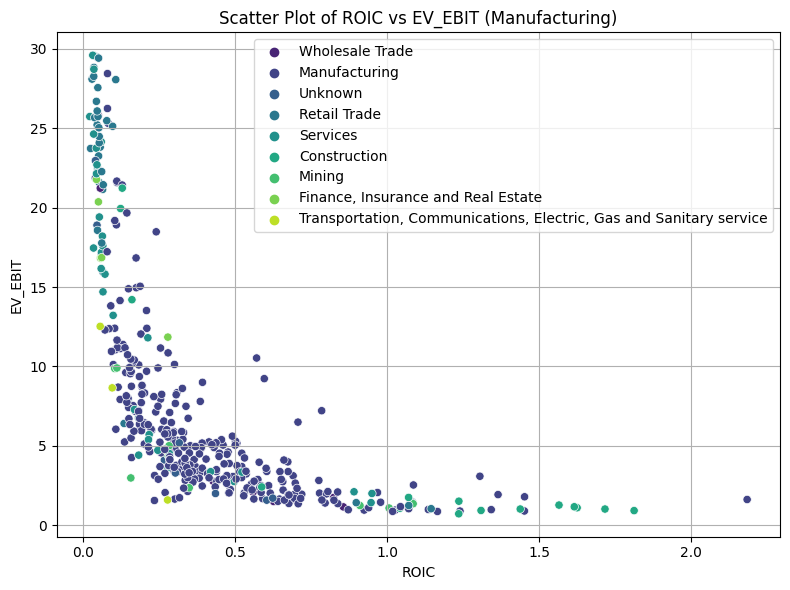

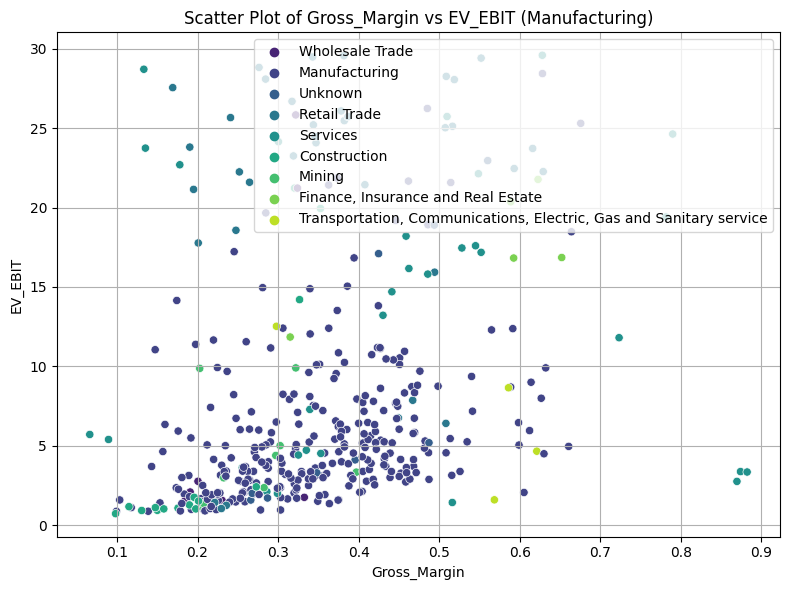

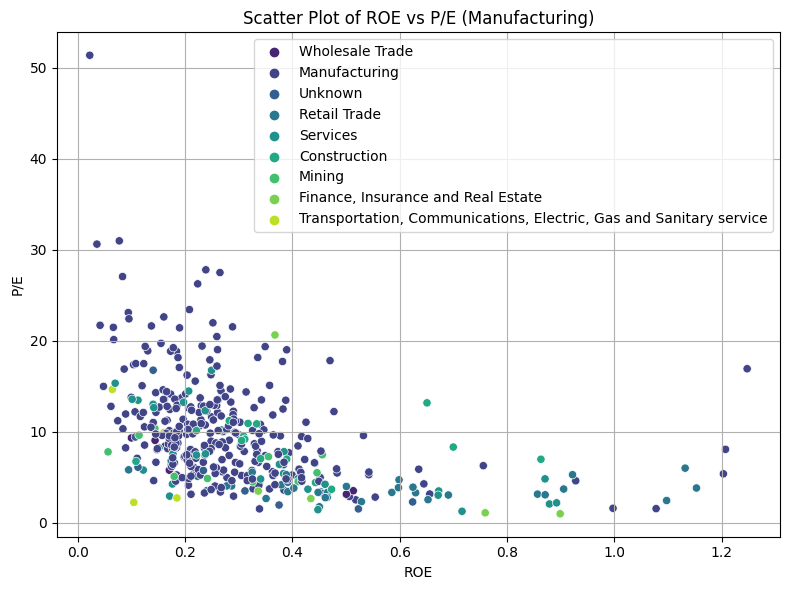

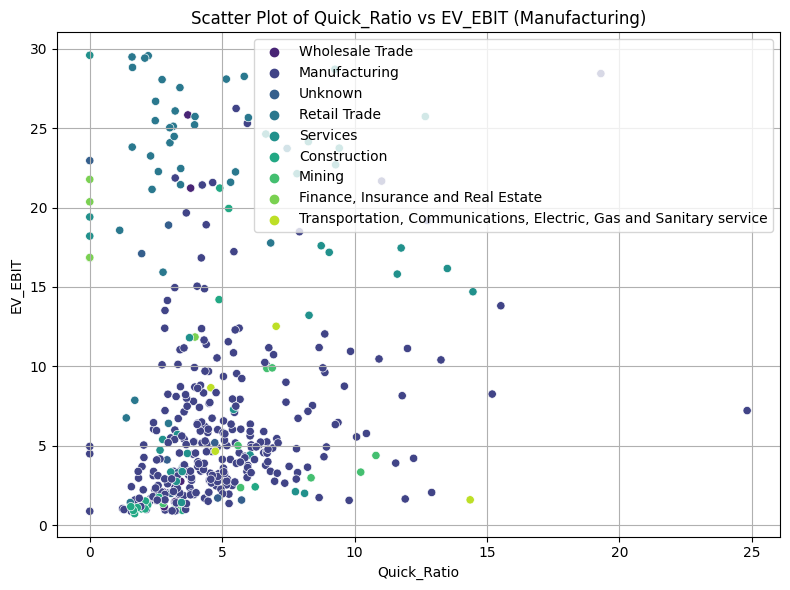

--- Mining ---


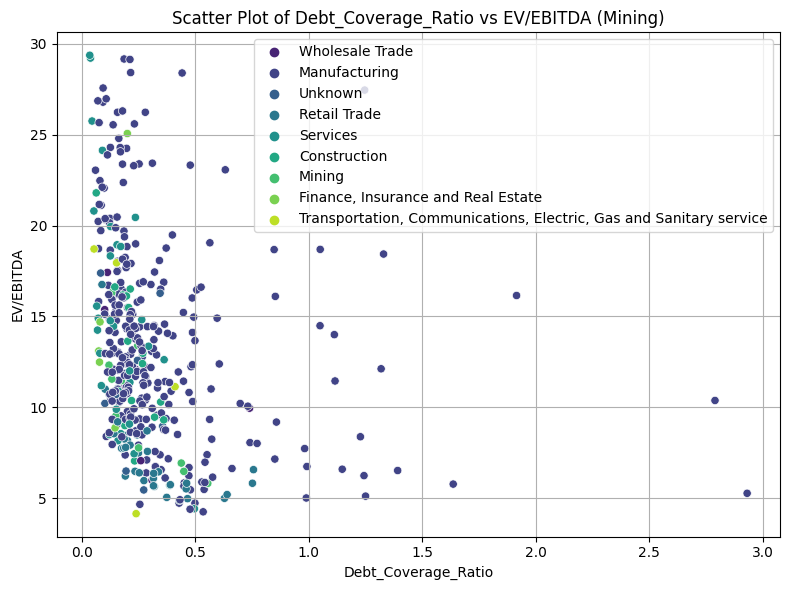

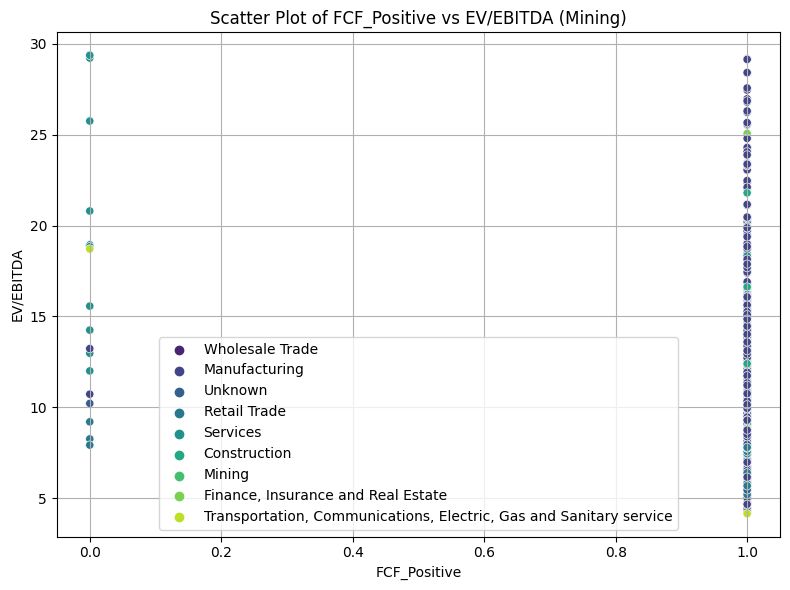

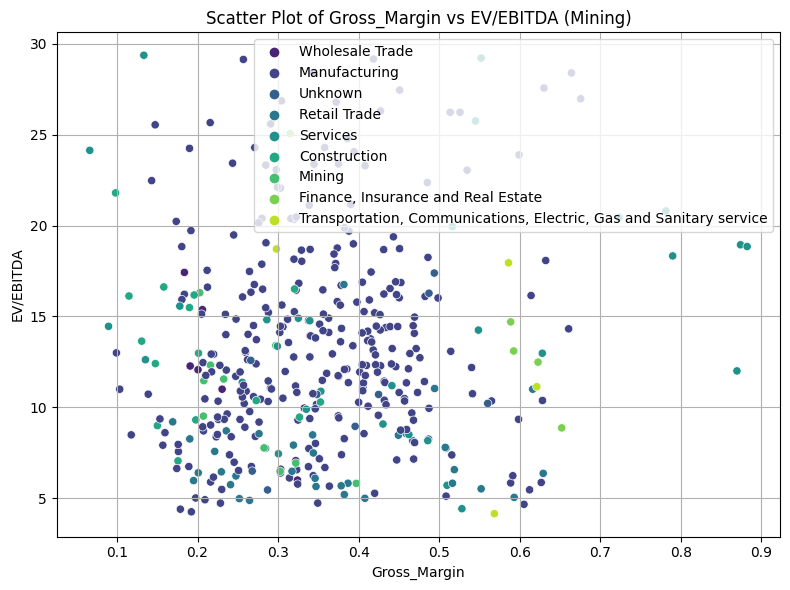

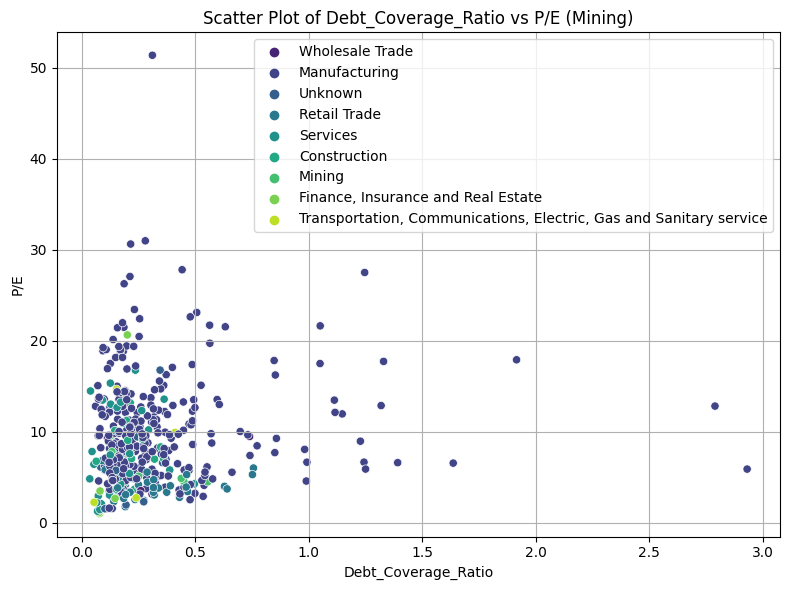

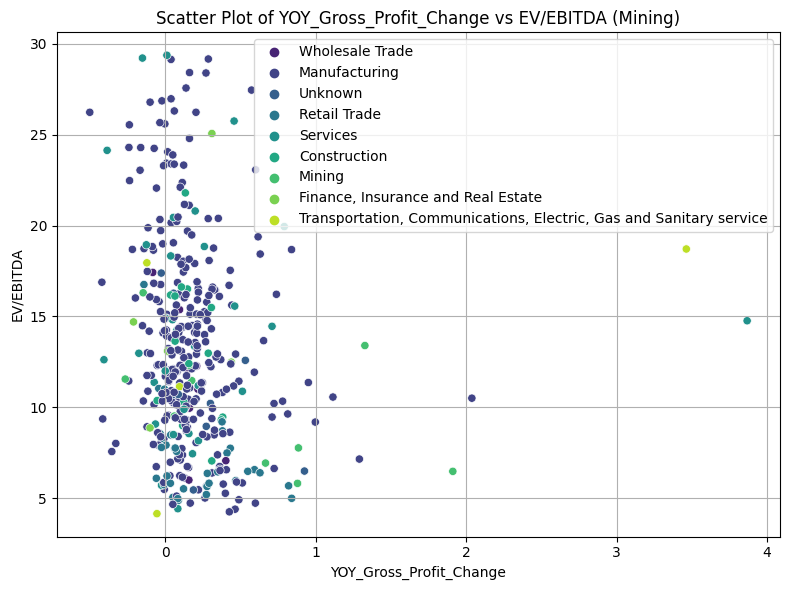

--- Retail Trade ---


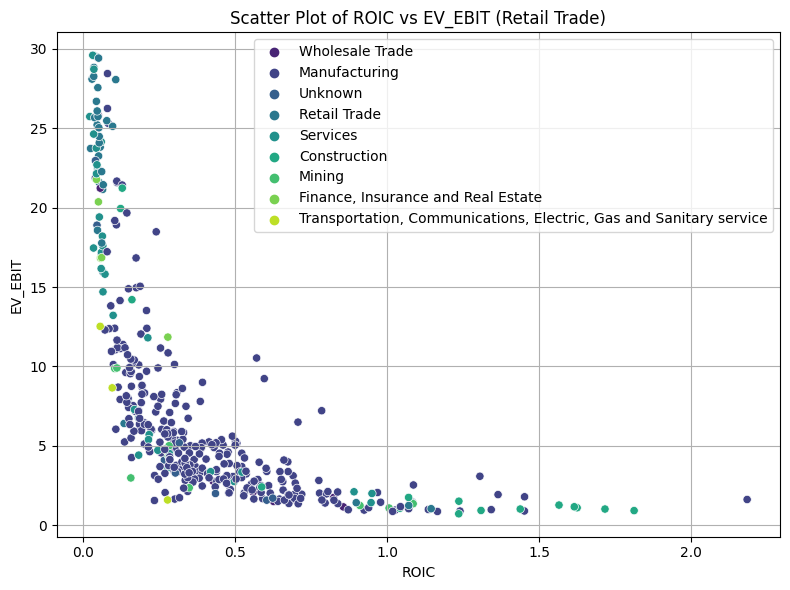

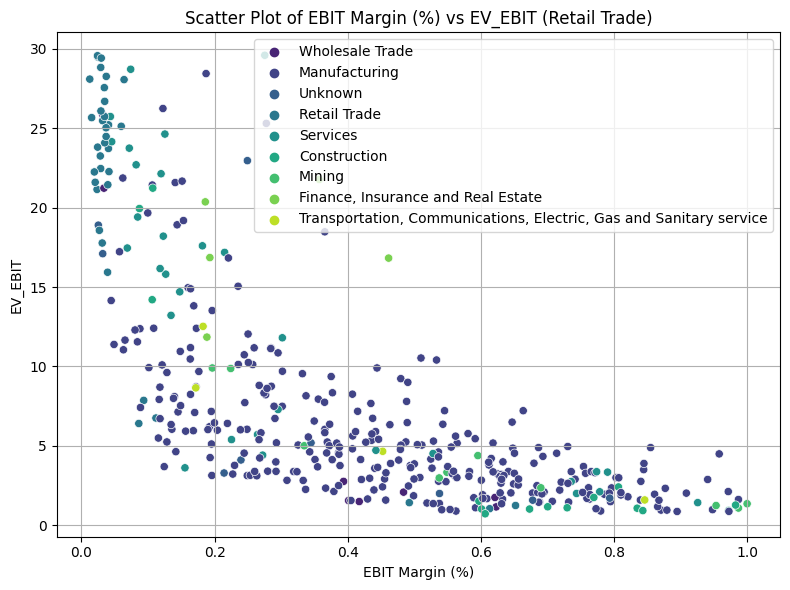

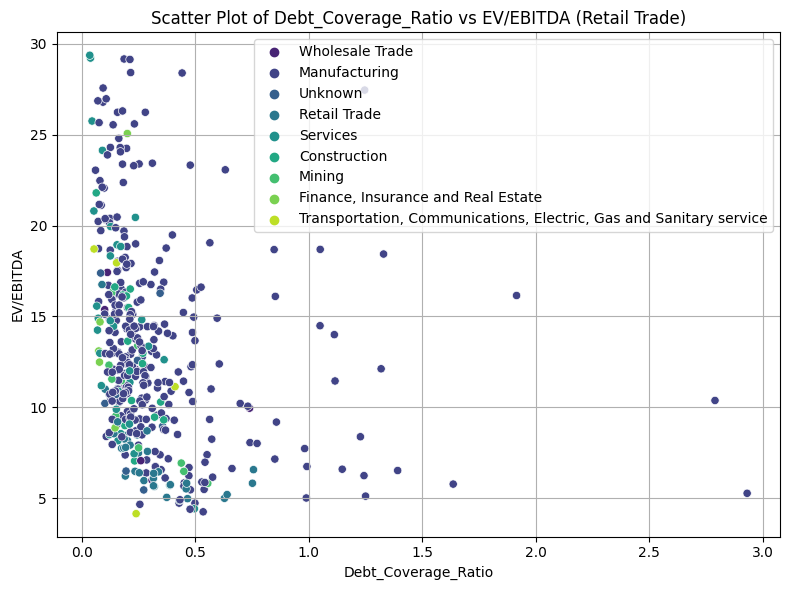

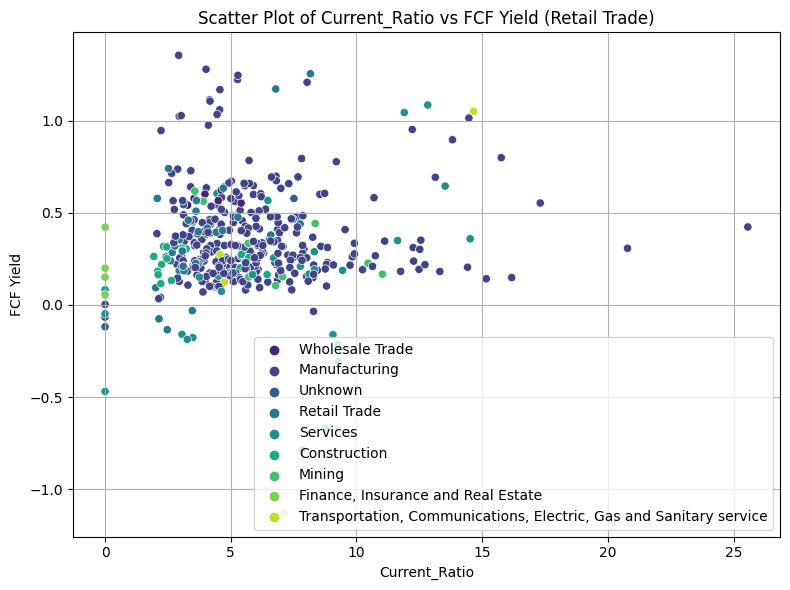

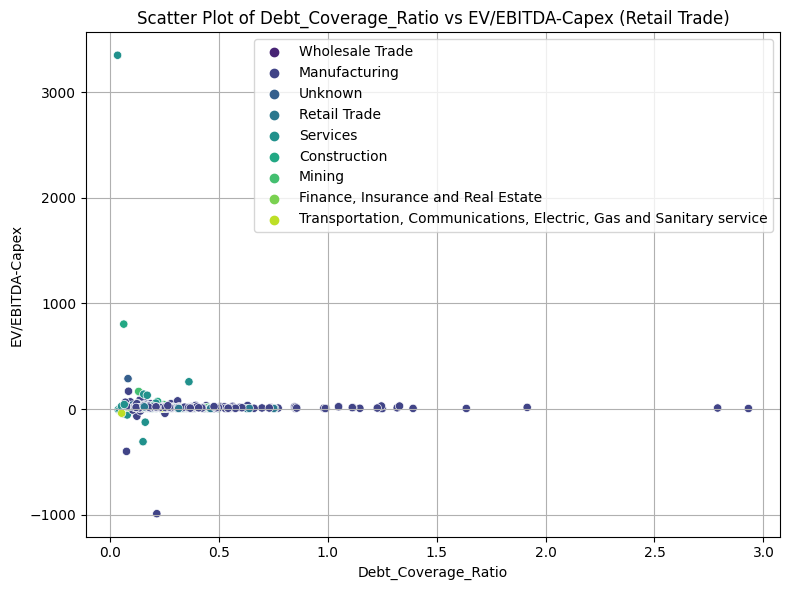

--- Services ---


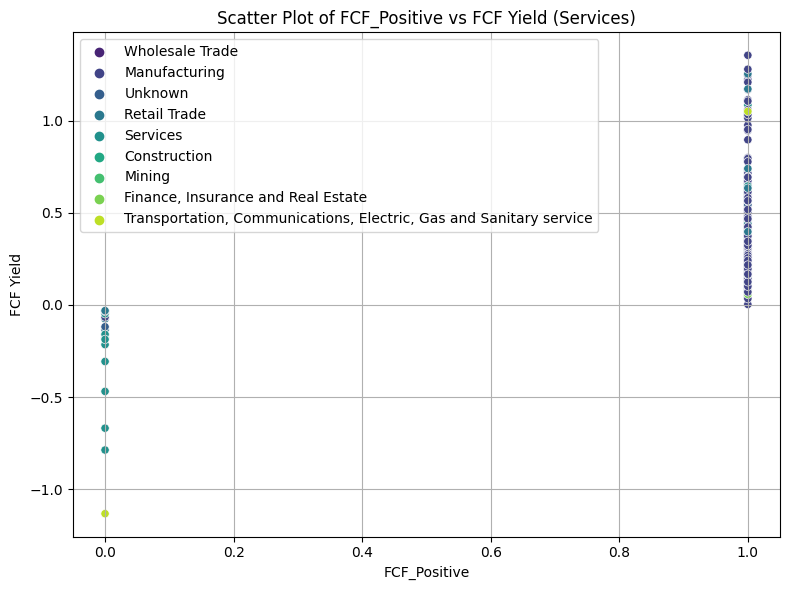

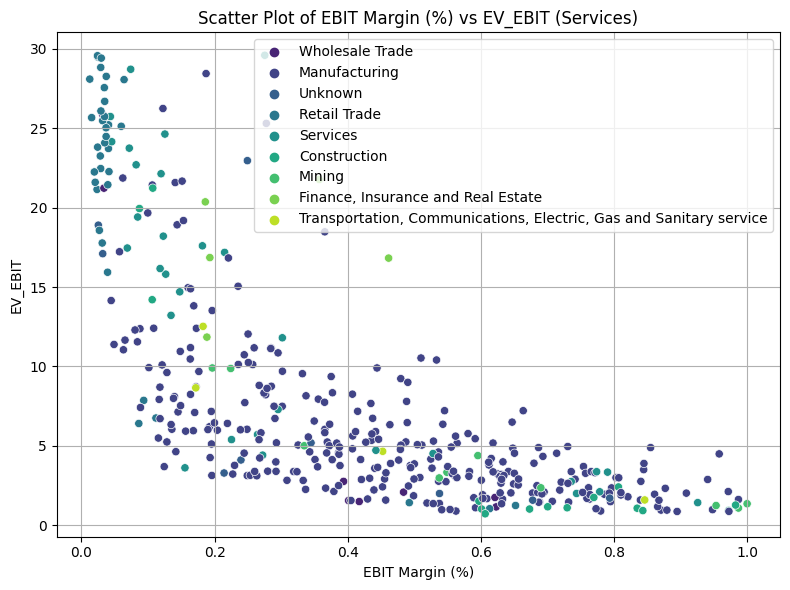

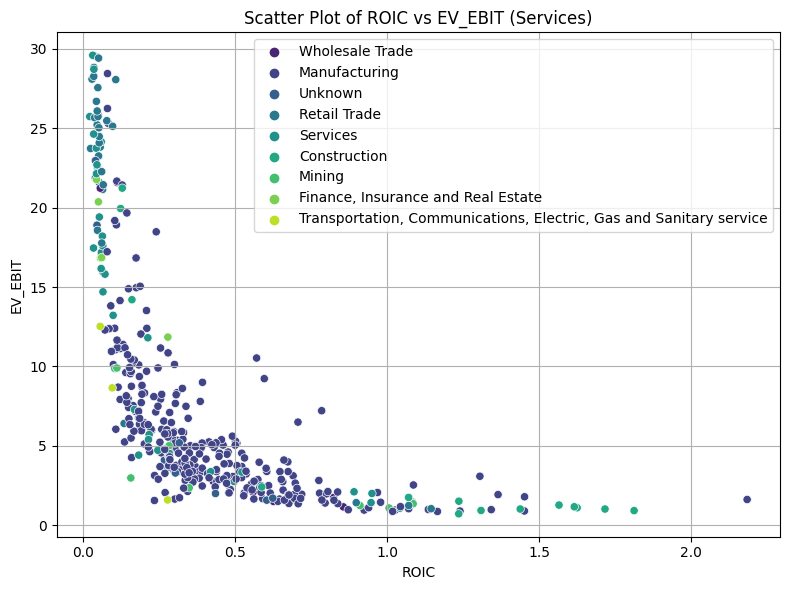

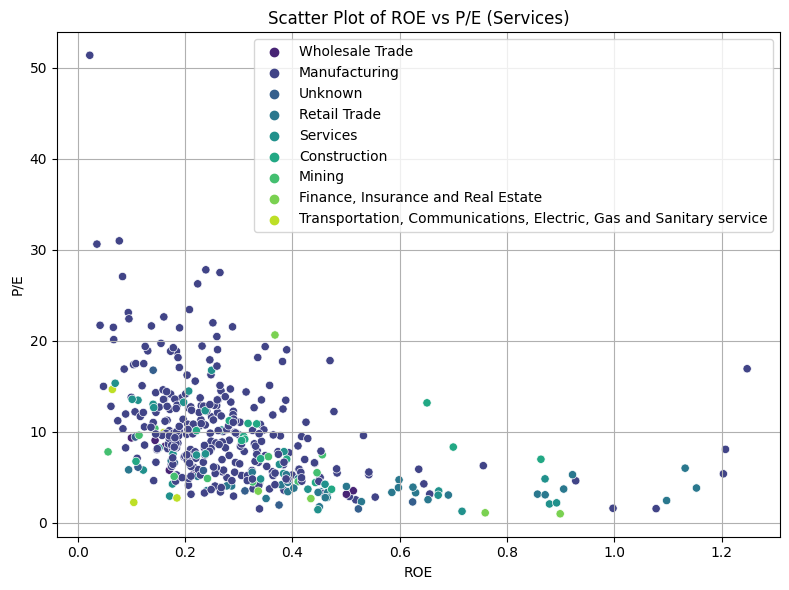

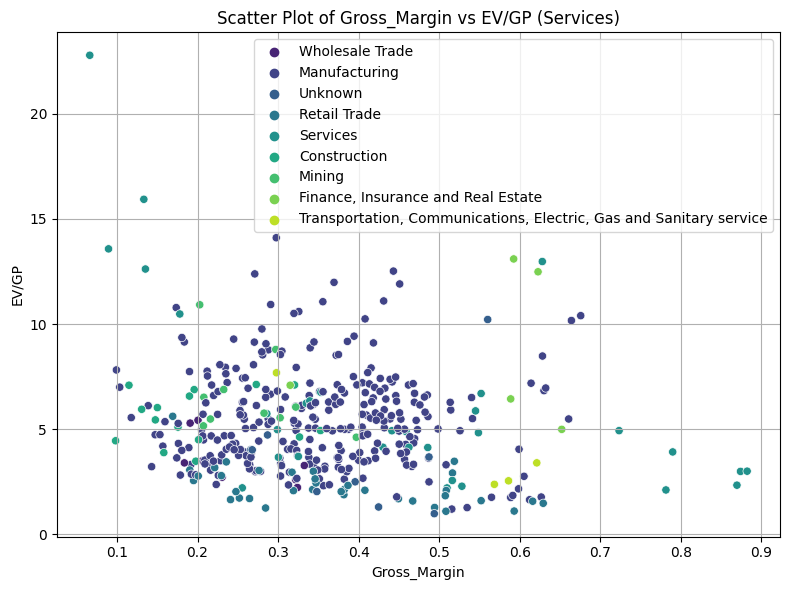

--- Transportation, Communications, Electric, Gas and Sanitary service ---


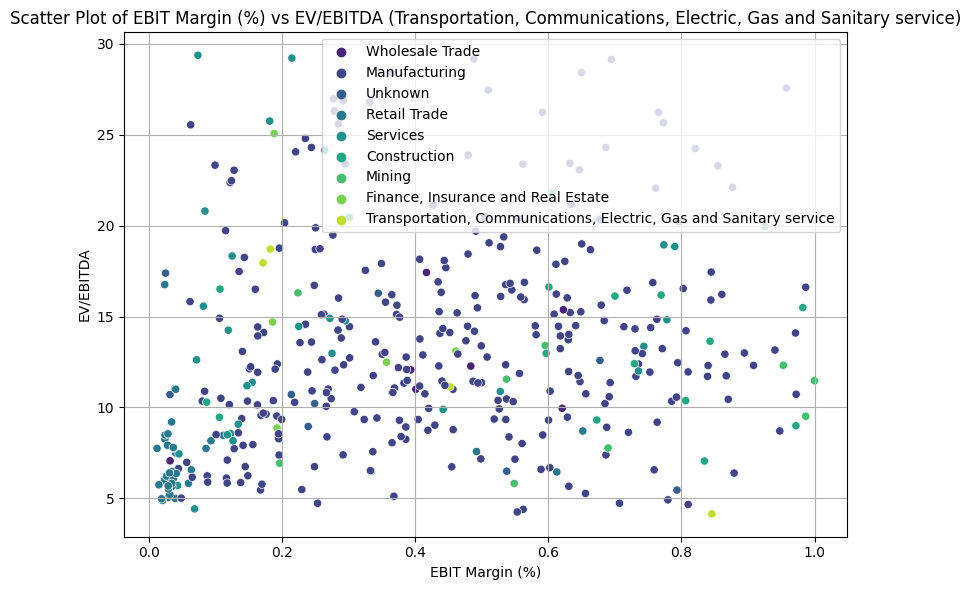

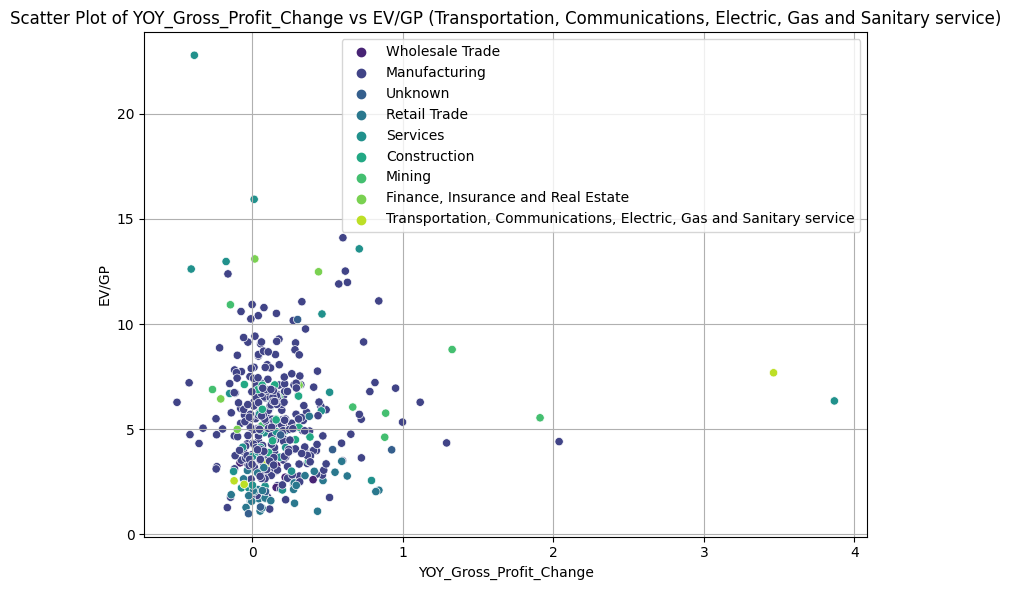

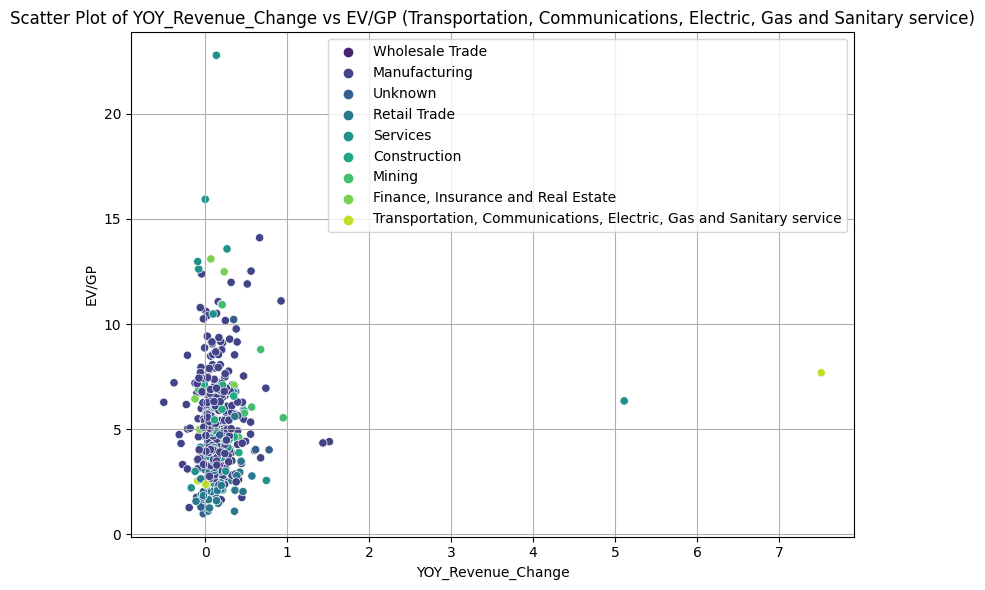

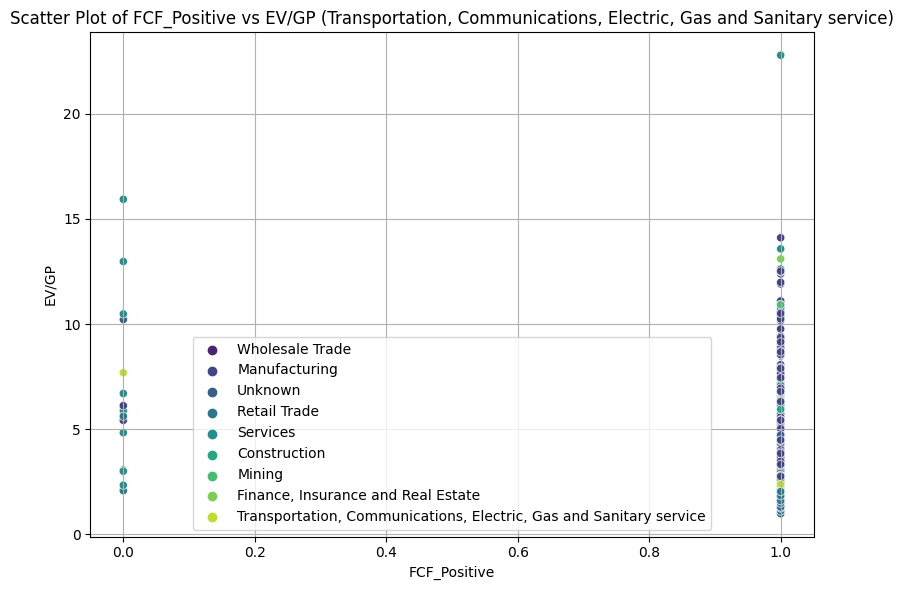

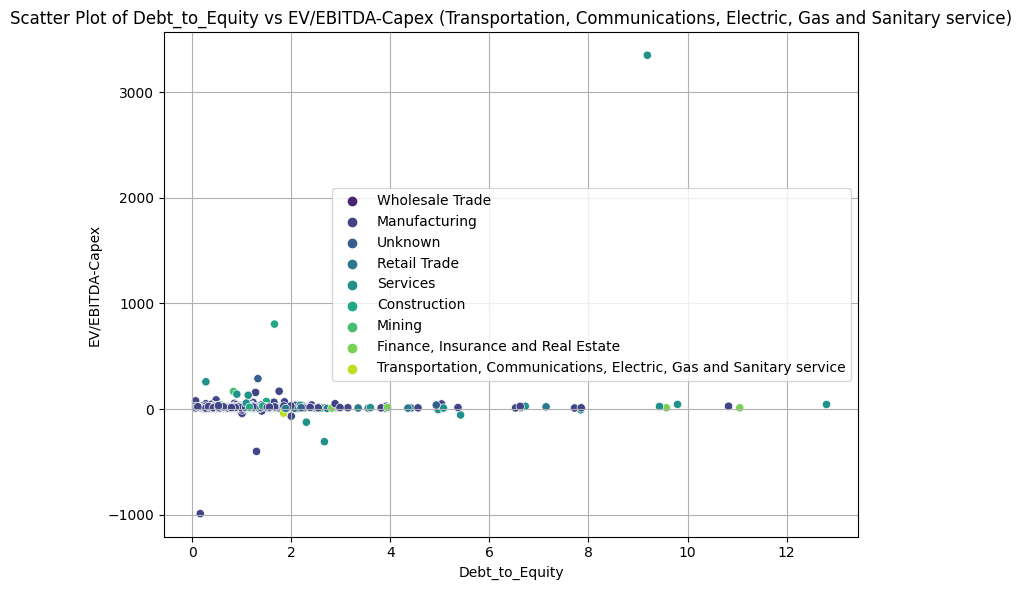

--- Unknown ---


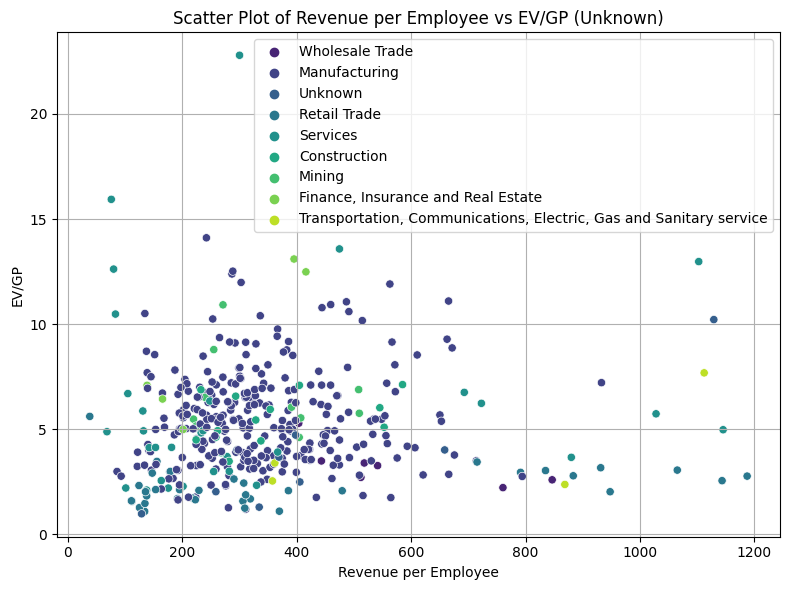

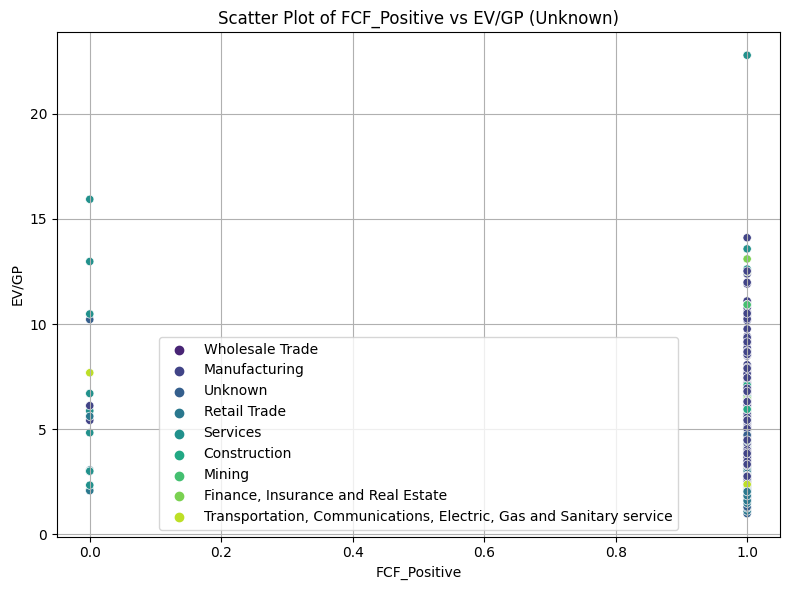

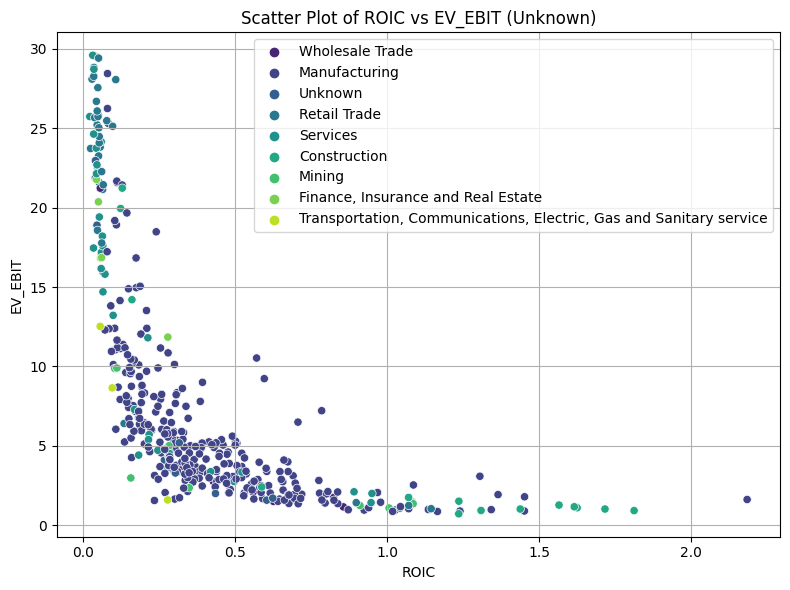

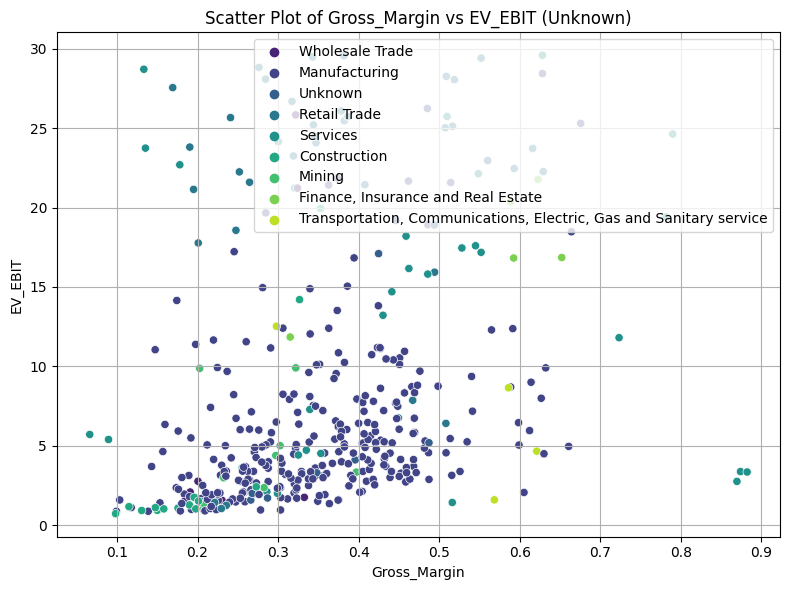

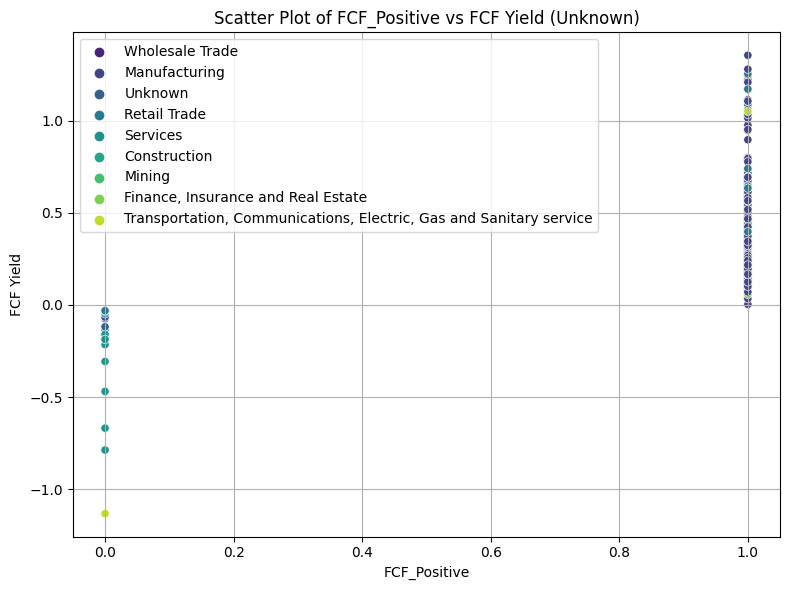

--- Wholesale Trade ---


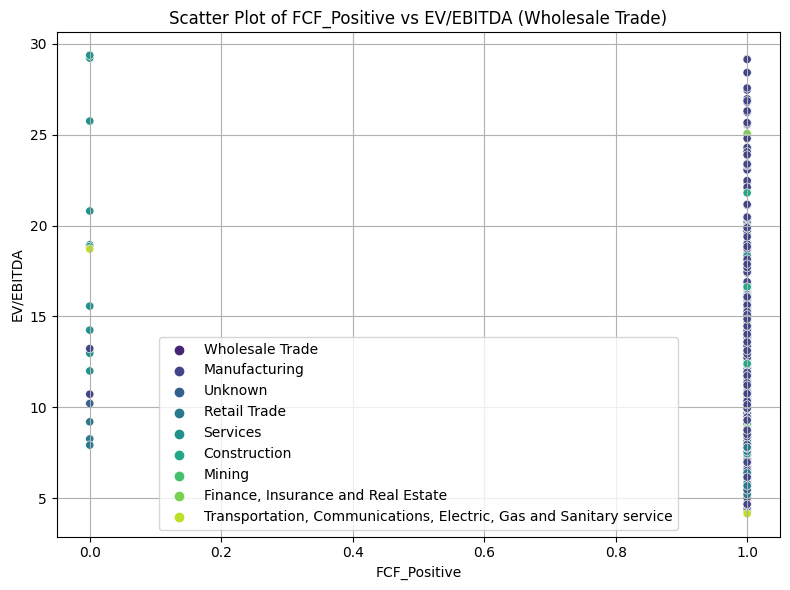

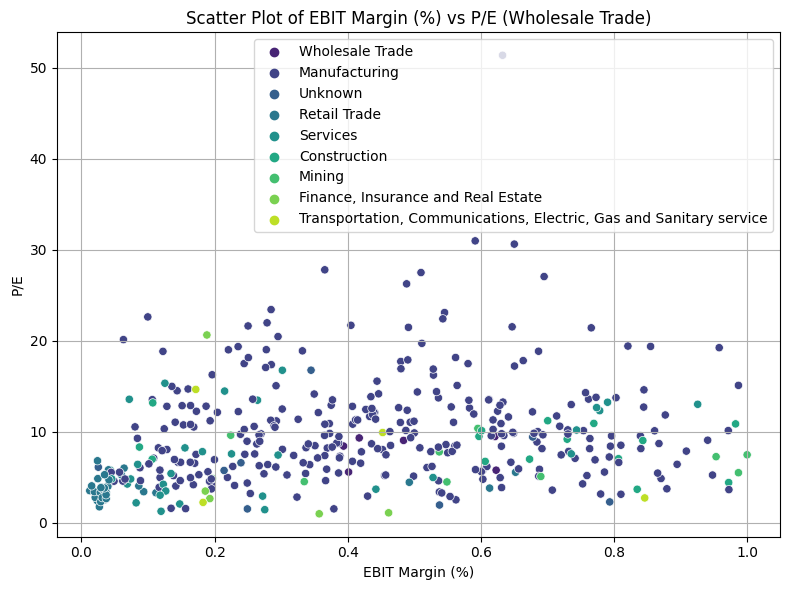

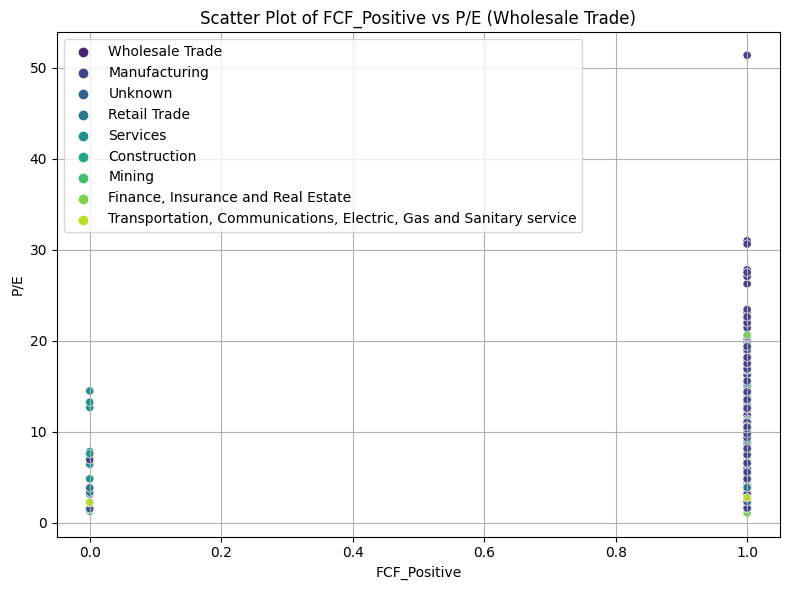

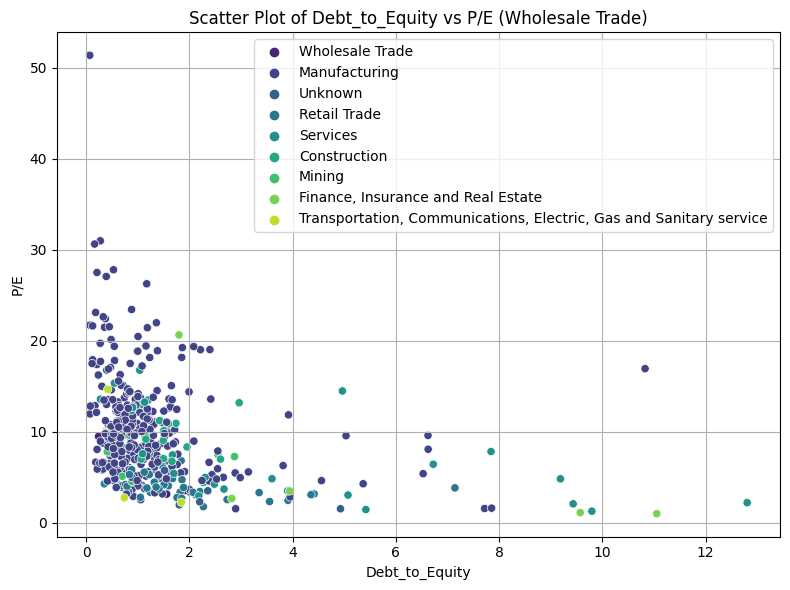

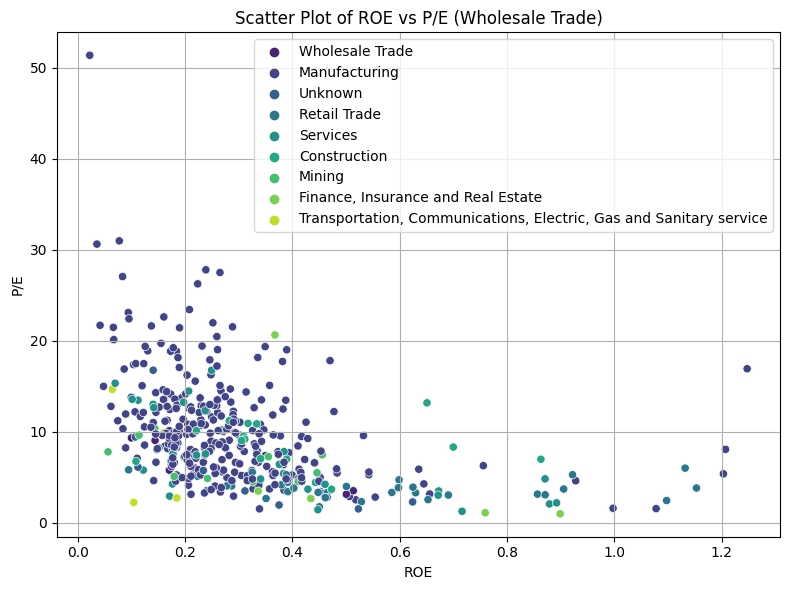

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Define the multiples and metrics
multiples = ['EV/EBITDA', 'P/E', 'EV/GP','EV_EBIT','FCF Yield','EV/EBITDA-Capex']
metrics = ['Debt_Coverage_Ratio', 'ROE', 'EBIT Margin (%)',
           'YOY_Gross_Profit_Change','ROIC','FCF_Positive',
           'Gross_Margin','Quick_Ratio','Current_Ratio','Debt_to_Equity',
           'Revenue per Employee','FCF_Positive','YOY_Revenue_Change','YOY_EBIT_Change']

# Group data by sector
grouped_data = selected_df.groupby('Division')

# Calculate correlation between multiples and metrics for each sector
correlation_results = {}
for sector, group in grouped_data:
    correlation_results[sector] = {}
    for multiple in multiples:
        for metric in metrics:
            correlation = group[multiple].corr(group[metric])
            correlation_results[sector][(multiple, metric)] = correlation

# Sort correlation results and select top 5 correlations
top_correlations = {}
for sector, result in correlation_results.items():
    top_correlations[sector] = sorted(result.items(), key=lambda x: abs(x[1]), reverse=True)[:5]

# Plot scatter plots for top 5 correlations
for sector, correlations in top_correlations.items():
    print(f"--- {sector} ---")
    for (multiple, metric), correlation in correlations:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=selected_df, x=metric, y=multiple, hue='Division', palette='viridis')
        plt.title(f'Scatter Plot of {metric} vs {multiple} ({sector})')
        plt.xlabel(metric)
        plt.ylabel(multiple)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()
